In [1]:
import random
import timeit
import matplotlib.pyplot as plt

In [2]:
#Professor Dolson's implementation of a Red Black Tree

import sys


# Node creation
class Node():
    next_id = 0
    def __init__(self, item):
        self.id = Node.next_id
        Node.next_id += 1
        self.item = item
        self.parent = None
        self.left = None
        self.right = None
        self.color = 1
        self.value = None

    def __eq__(self, other):
        return self.id == other.id

    def __repr__(self):
        return "ID: " + str(self.id) + " Value: " + str(self.item)        

class RedBlackTree():
    def __init__(self):
        self.TNULL = Node(0)
        self.TNULL.id = -1
        self.TNULL.color = 0
        self.TNULL.left = None
        self.TNULL.right = None
        self.root = self.TNULL
        self.size = 0

    # Preorder
    def pre_order_helper(self, node):
        if node != self.TNULL:
            sys.stdout.write(str(node.item) + " ")
            self.pre_order_helper(node.left)
            self.pre_order_helper(node.right)

    # Inorder
    def in_order_helper(self, node):
        if node != self.TNULL:
            self.in_order_helper(node.left)
            sys.stdout.write(str(node.item) + " ")
            self.in_order_helper(node.right)

    # Postorder
    def post_order_helper(self, node):
        if node != self.TNULL:
            self.post_order_helper(node.left)
            self.post_order_helper(node.right)
            sys.stdout.write(str(node.item) + " ")

    # Search the tree
    def search_tree_helper(self, node, key):
        if node == self.TNULL or key == node.item:
            return node

        if key < node.item:
            return self.search_tree_helper(node.left, key)
        return self.search_tree_helper(node.right, key)

    # Balancing the tree after deletion
    def delete_fix(self, x):
        # print(x.item, x == self.TNULL, x is None, self.size, x.parent, x.parent.left, x.parent.right, x.parent.right.left, x.parent.right.right)
        # if x.parent.right.right is None:
        #     self.print_tree()
        while x != self.root and x.color == 0:
            if x == x.parent.left:
                s = x.parent.right
                if s.color == 1:
                    s.color = 0
                    x.parent.color = 1
                    self.left_rotate(x.parent)
                    s = x.parent.right

                if s.left.color == 0 and s.right.color == 0:
                    s.color = 1
                    x = x.parent
                else:
                    if s.right.color == 0:
                        s.left.color = 0
                        s.color = 1
                        self.right_rotate(s)
                        s = x.parent.right

                    s.color = x.parent.color
                    x.parent.color = 0
                    s.right.color = 0
                    self.left_rotate(x.parent)
                    x = self.root
            else:
                s = x.parent.left
                if s.color == 1:
                    s.color = 0
                    x.parent.color = 1
                    self.right_rotate(x.parent)
                    s = x.parent.left

                if s.left.color == 0 and s.right.color == 0:
                    s.color = 1
                    x = x.parent
                else:
                    if s.left.color == 0:
                        s.right.color = 0
                        s.color = 1
                        self.left_rotate(s)
                        s = x.parent.left

                    s.color = x.parent.color
                    x.parent.color = 0
                    s.left.color = 0
                    self.right_rotate(x.parent)
                    x = self.root
        x.color = 0

    def __rb_transplant(self, u, v):
        if u.parent is None:
            self.root = v
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        v.parent = u.parent

    # Node deletion
    def delete_node_helper(self, node, key):
        z = self.TNULL
        while node != self.TNULL:
            if node.item == key:
                z = node

            if node.item <= key:
                node = node.right
            else:
                node = node.left

        if z == self.TNULL:
            # print("Cannot find key in the tree")
            return

        y = z
        y_original_color = y.color
        if z.left == self.TNULL:
            # If no left child, just scoot the right subtree up
            x = z.right
            self.__rb_transplant(z, z.right)
        elif (z.right == self.TNULL):
            # If no right child, just scoot the left subtree up
            x = z.left
            self.__rb_transplant(z, z.left)
        else:
            y = self.minimum(z.right)
            y_original_color = y.color
            x = y.right
            if y.parent == z:
                x.parent = y
            else:
                self.__rb_transplant(y, y.right)
                y.right = z.right
                y.right.parent = y

            self.__rb_transplant(z, y)
            y.left = z.left
            y.left.parent = y
            y.color = z.color
        if y_original_color == 0:
            self.delete_fix(x)

        self.size -= 1

    # Balance the tree after insertion
    def fix_insert(self, k):
        while k.parent.color == 1:
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left
                if u.color == 1:
                    u.color = 0
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self.right_rotate(k)
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.left_rotate(k.parent.parent)
            else:
                u = k.parent.parent.right

                if u.color == 1:
                    u.color = 0
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self.left_rotate(k)
                    k.parent.color = 0
                    k.parent.parent.color = 1
                    self.right_rotate(k.parent.parent)
            if k == self.root:
                break
        self.root.color = 0

    # Printing the tree
    def __print_helper(self, node, indent, last):
        if node != self.TNULL:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----  ")
                indent += "     "
            else:
                sys.stdout.write("L----   ")
                indent += "|    "

            s_color = "RED" if node.color == 1 else "BLACK"
            print(str(node.item) + "(" + s_color + ")")
            self.__print_helper(node.left, indent, False)
            self.__print_helper(node.right, indent, True)

    def preorder(self):
        self.pre_order_helper(self.root)

    def inorder(self):
        self.in_order_helper(self.root)

    def postorder(self):
        self.post_order_helper(self.root)

    def search(self, k):
        return self.search_tree_helper(self.root, k)

    def minimum(self, node=None):
        if node is None:
            node = self.root
        if node == self.TNULL:
            return self.TNULL
        while node.left != self.TNULL:
            node = node.left
        return node

    def maximum(self, node=None):
        if node is None:
            node = self.root
        if node == self.TNULL:
            return self.TNULL
        while node.right != self.TNULL:
            node = node.right
        return node

    def successor(self, x):
        if x.right != self.TNULL:
            return self.minimum(x.right)

        y = x.parent
        while y != self.TNULL and x == y.right:
            x = y
            y = y.parent
        return y

    def predecessor(self,  x):
        if (x.left != self.TNULL):
            return self.maximum(x.left)

        y = x.parent
        while y != self.TNULL and x == y.left:
            x = y
            y = y.parent

        return y

    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.TNULL:
            y.left.parent = x

        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.TNULL:
            y.right.parent = x

        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    def insert(self, key):
        node = Node(key)
        node.parent = None
        node.item = key
        node.left = self.TNULL
        node.right = self.TNULL
        node.color = 1

        y = None
        x = self.root

        while x != self.TNULL:
            y = x
            if node.item < x.item:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y is None:
            self.root = node
        elif node.item < y.item:
            y.left = node
        else:
            y.right = node
        
        self.size += 1

        if node.parent is None:
            node.color = 0
            return

        if node.parent.parent is None:
            return

        self.fix_insert(node)

    def get_root(self):
        return self.root

    def delete(self, item):
        self.delete_node_helper(self.root, item)

    def print_tree(self):
        self.__print_helper(self.root, "", True)

    def __getitem__(self, key):
        return self.search(key).value

    def __setitem__(self, key, value):
        self.search(key).value = value


In [110]:
len_10_set_up = '''
n = 10
'''
len_100_set_up = '''
n = 100
'''
len_1000_set_up = '''
n = 1000
'''

len_10000_set_up = '''
n = 10000
'''
len_100000_set_up = '''
n = 100000
'''
len_1000000_set_up = '''
n = 1000000
'''
bst = '''
bst = RedBlackTree()
for i in range(n):
    bst.insert(n)
'''
    
hash_function  = '''
for i in range(n):
    my_dict[n] = 'added'
'''

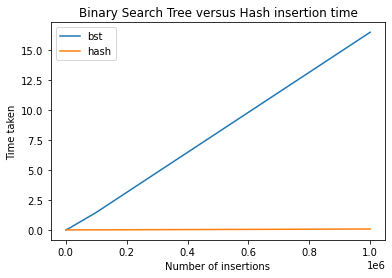

In [113]:
set_ups = [len_10_set_up,len_100_set_up,len_1000_set_up,len_10000_set_up,len_100000_set_up,
           len_1000000_set_up]
n_values = [10,100,1000,10000,100000,1000000]
bst_time = []
hash_time = []
for i in range(len(set_ups)):
    time = 0
    time = sum(timeit.repeat(setup = set_ups[i],
                     stmt = hash_function,
                     number = 1,
                     repeat=1,
                     globals=globals()))
    hash_time.append(time)
    time = 0
    time = sum(timeit.repeat(setup = set_ups[i],
                     stmt = bst,
                     number = 1,
                     repeat=1,
                     globals=globals()))
    bst_time.append(time)
plt.plot(n_values, bst_time, label='bst')
plt.plot(n_values, hash_time, label = 'hash')
plt.xlabel('Number of insertions')
plt.ylabel("Time taken")
plt.title("Binary Search Tree versus Hash insertion time")
plt.legend()